In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [2]:
x = data.values[:, 0]
y = data.values[:, 1]
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


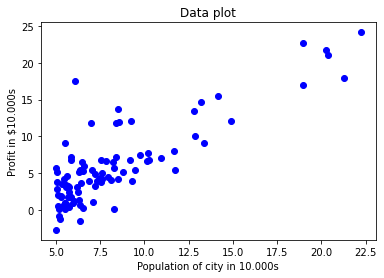

In [3]:
plt.plot(x, y, 'bo')
plt.title('Data plot')
plt.xlabel('Population of city in 10.000s')
plt.ylabel('Profit in $10.000s')
plt.show()

In [4]:
data.insert(loc=0, column='Theta', value=[1 for i in range(data.shape[0])])
display(data.head())

,Theta,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [5]:
X = data[['Theta','Population']]
Y = data[['Profit']]

X_mat = np.matrix(X.values)
Y_mat = np.matrix(Y.values)
theta = np.zeros((X.shape[1], 1))

In [6]:
def computeCost(X, y, theta):
        m = y.shape[0]
        return (1/(2*m))*np.sum(np.square(X*theta-y))
    # 2-3 code lines as series of matrix operation
print(computeCost(X_mat, Y_mat, theta))


32.072733877455676


theta = [[-3.24140214]
 [ 1.1272942 ]]
final cost = 4.515955503078914


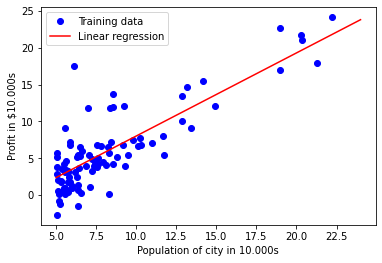

In [7]:
def simple_gradient(X, y, theta, alpha, it):
    # it - number of iterations
    cost = []
    for i in range(it):
        theta = theta - (1/y.shape[0]) * alpha * np.transpose(X) * (X * theta - y)
        cost.append(computeCost(X, y, theta))
 
 
    return theta, cost

X_mat = np.matrix(X.values)
y_mat = np.matrix(Y.values)
theta = np.zeros((X.shape[1], 1))
alpha = 0.01
it = 1000
th, cost = simple_gradient(X_mat, Y_mat, theta, alpha, it)

print(f'theta = {th}\nfinal cost = {cost[-1]}')
x_ax = np.arange(5, 25)
plt.plot(x, y, 'bo')
plt.plot(x_ax, th.flat[1]*x_ax+th.flat[0], 'r-')
plt.xlabel('Population of city in 10.000s')
plt.ylabel('Profit in $10.000s')
plt.legend(['Training data', 'Linear regression'])
plt.show()

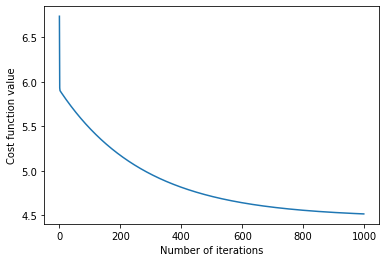

In [8]:
plt.plot(range(it), cost)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function value')
plt.show()

In [9]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [10]:
# feature normalization
for col in data2:
    data2[col] = (data2[col] - data2[col].mean()) / data2[col].std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [12]:
data2.insert(loc=0, column='Theta', value=[1 for i in range(data2.shape[0])])
display(data2.head())

,Theta,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [14]:
X = data2[['Theta','Size', 'Bedrooms']]
Y = data2[['Price']]

X_mat = np.matrix(X.values)
Y_mat = np.matrix(Y.values)
theta = np.zeros((X.shape[1], 1))
print(computeCost(X_mat, Y_mat, theta))

0.4893617021276595


In [15]:
alpha = 0.01
it = 1000
th, cost = simple_gradient(X_mat, Y_mat, theta, alpha, it)

print(f'theta = {th}\nfinal cost = {cost[-1]}')


theta = [[-1.10710594e-16]
 [ 8.78503652e-01]
 [-4.69166570e-02]]
final cost = 0.1307033696077189


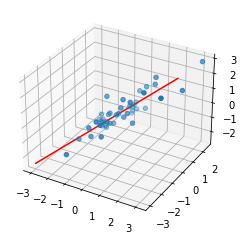

In [26]:
x_ax = np.arange(-3, 3)
y_ax = np.arange(-3, 3)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data2.Size, data2.Bedrooms, data2.Price)
ax.plot(x_ax, y_ax, x_ax * th.flat[1] + th.flat[0] + y_ax * th.flat[2], 'r-')
plt.show()

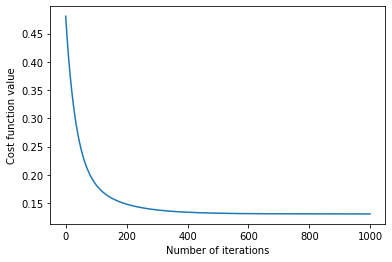

In [27]:
plt.plot(range(it), cost)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function value')
plt.show()

[[0.         1.34577162]] [-5.18404774]
Coefficients: 
 [[0.         1.34577162]]
Residual sum of squares: Profit    14.073842
dtype: float64


c:\Users\tomek\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


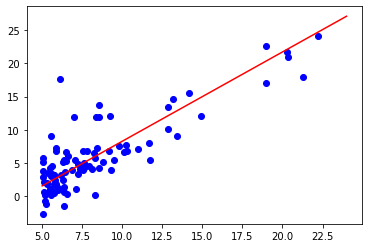

In [45]:
# python package
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
 
# Data import


 
# Normalization
 
 
# Split into train and test sets (70-30%)
X = data[['Theta','Population']]
Y = data[['Profit']]

X_mat = np.matrix(X.values)
Y_mat = np.matrix(Y.values)
theta = np.zeros((X.shape[1], 1))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
 
# Creating an object 
regr = linear_model.LinearRegression()
 
# Learning model on training data
lin_reg = regr.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)

x_ax = np.arange(5, 25)
plt.plot(x, y, 'bo')
plt.plot(x_ax, x_ax * lin_reg.coef_[0][1] + lin_reg.intercept_[0], 'r-')
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))